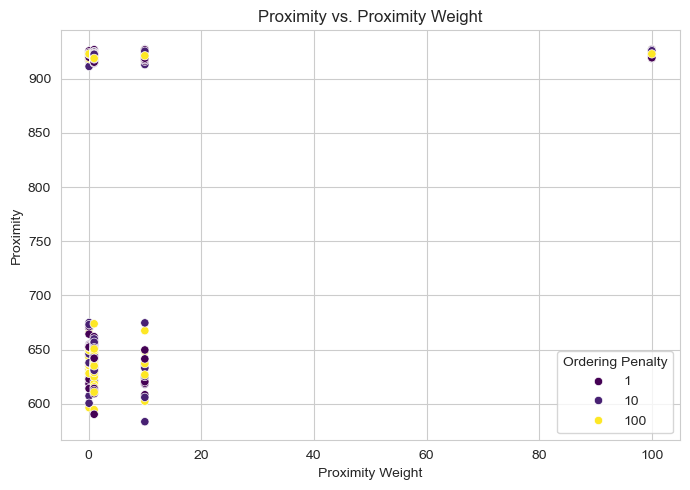

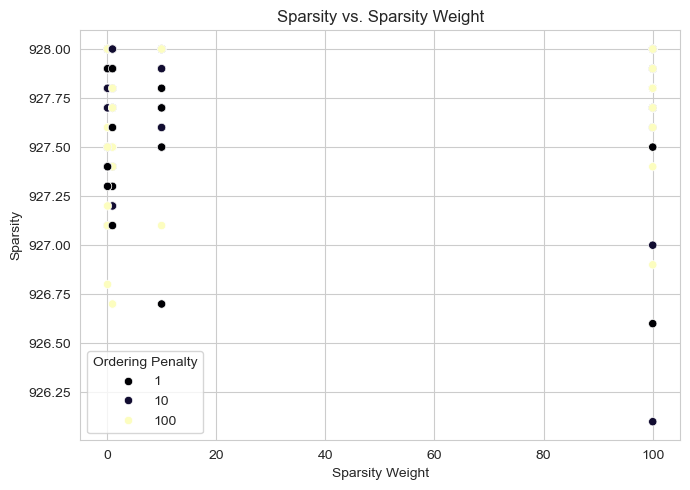

ValueError: Could not interpret value `diversity_mean` for `y`. An entry with this name does not appear in `data`.

<Figure size 700x500 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the experiment log
df = pd.read_csv('cf_experiment_log_1.csv')

# Plot 1: Proximity vs. Proximity Weight
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='proximity_weight', y='proximity', hue='ordering_penalty', palette='viridis')
plt.title('Proximity vs. Proximity Weight')
plt.xlabel('Proximity Weight')
plt.ylabel('Proximity')
plt.legend(title='Ordering Penalty')
plt.tight_layout()
plt.show()

# Plot 2: Sparsity vs. Sparsity Weight
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='sparsity_weight', y='sparsity', hue='ordering_penalty', palette='magma')
plt.title('Sparsity vs. Sparsity Weight')
plt.xlabel('Sparsity Weight')
plt.ylabel('Sparsity')
plt.legend(title='Ordering Penalty')
plt.tight_layout()
plt.show()

# Plot 3: Diversity Mean vs. Diversity Weight
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='diversity_weight', y='diversity_mean', hue='ordering_penalty', palette='plasma')
plt.title('Mean Diversity vs. Diversity Weight')
plt.xlabel('Diversity Weight')
plt.ylabel('Mean Diversity')
plt.legend(title='Ordering Penalty')
plt.tight_layout()
plt.show()

# Plot 4: Diversity Std vs. Diversity Weight
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='diversity_weight', y='diversity_std', hue='ordering_penalty', palette='cool')
plt.title('Diversity Std vs. Diversity Weight')
plt.xlabel('Diversity Weight')
plt.ylabel('Diversity Std')
plt.legend(title='Ordering Penalty')
plt.tight_layout()
plt.show()


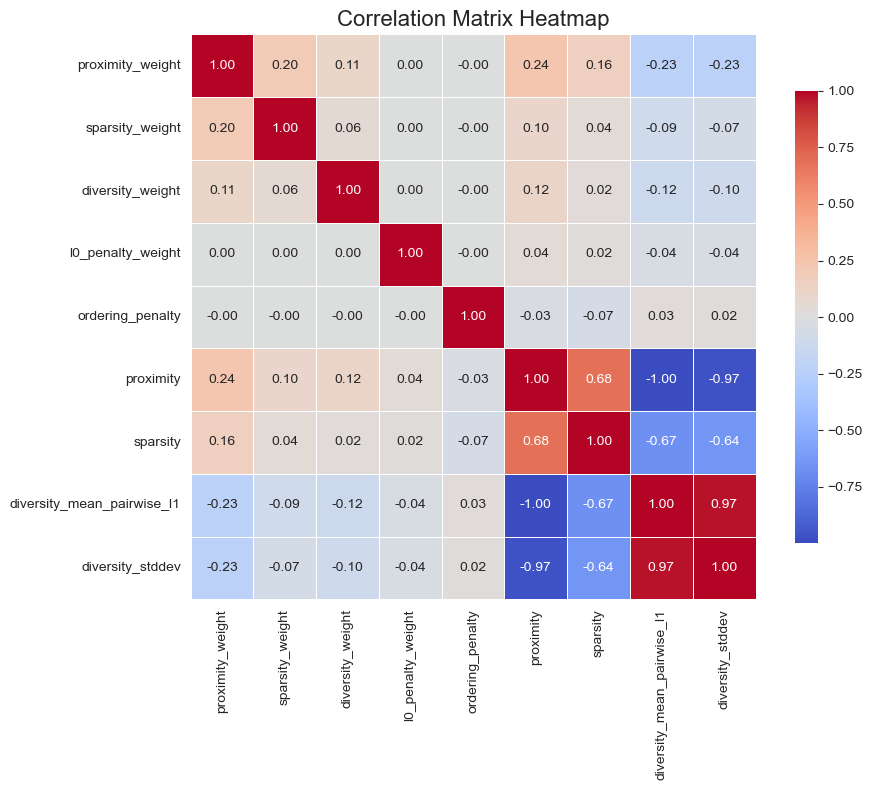

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("cf_experiment_log_1.csv")  # Change path if needed

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix,
            annot=True,         # show correlation coefficients
            fmt=".2f",          # format to 2 decimal places
            cmap="coolwarm",    # diverging color palette
            square=True,        # keep cells square
            linewidths=0.5,     # lines between cells
            cbar_kws={"shrink": 0.8})  # shrink color bar

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# from pandas.plotting import parallel_coordinates
#
# # Normalize for better plotting
# from sklearn.preprocessing import MinMaxScaler
# scaled_df = df.copy()
# columns_to_scale = ['proximity_weight', 'sparsity_weight', 'diversity_weight',
#                     'l0_penalty_weight', 'ordering_penalty',
#                     'proximity', 'sparsity', 'diversity_mean_pairwise_l1']
# scaled_df[columns_to_scale] = MinMaxScaler().fit_transform(df[columns_to_scale])
#
# # Add a score label (optional)
# scaled_df['score'] = df['proximity'] + df['sparsity'] - df['diversity_mean_pairwise_l1']
#
# parallel_coordinates(scaled_df, class_column='score', cols=columns_to_scale, color=('#556270'))
# plt.xticks(rotation=90)
# plt.title('Hyperparameter Tuning Results')
# plt.show()


In [6]:
# Define a custom scoring function (optional)
def score(row, proximity_weight=0.5, sparsity_weight=0.3, diversity_weight=0.2):
    return (
        -proximity_weight * row['proximity'] +  # lower is better
        -sparsity_weight * row['sparsity'] +    # lower is better
        diversity_weight * row['diversity_mean_pairwise_l1']  # higher is better
    )

df['Weighted_Objective_Score'] = df.apply(score, axis=1)
top_configs = df.sort_values(by='Weighted_Objective_Score', ascending=False).head(10)

print(top_configs[['proximity_weight', 'sparsity_weight', 'diversity_weight',
                   'l0_penalty_weight', 'ordering_penalty',
                   'proximity', 'sparsity', 'diversity_mean_pairwise_l1', 'Weighted_Objective_Score']])



     proximity_weight  sparsity_weight  diversity_weight  l0_penalty_weight  \
397              10.0              0.1                 1                  0   
339               1.0            100.0                 0                  1   
128               0.1             10.0                 5                 10   
275               1.0              1.0                 5                100   
187               0.1            100.0                10                 10   
401              10.0              0.1                 1                  1   
178               0.1            100.0                 5                100   
409              10.0              0.1                 5                  0   
408              10.0              0.1                 5                  0   
344               1.0            100.0                 0                 10   

     ordering_penalty   proximity  sparsity  diversity_mean_pairwise_l1  \
397                10  583.390479     927.4            

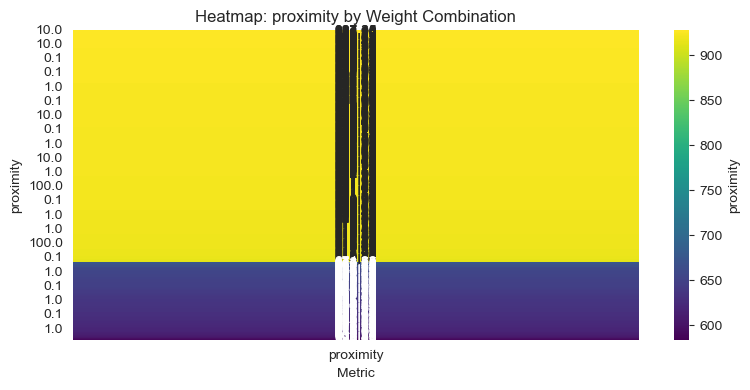

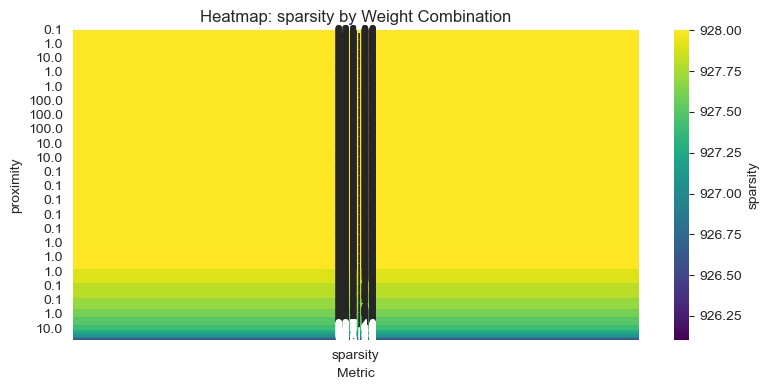

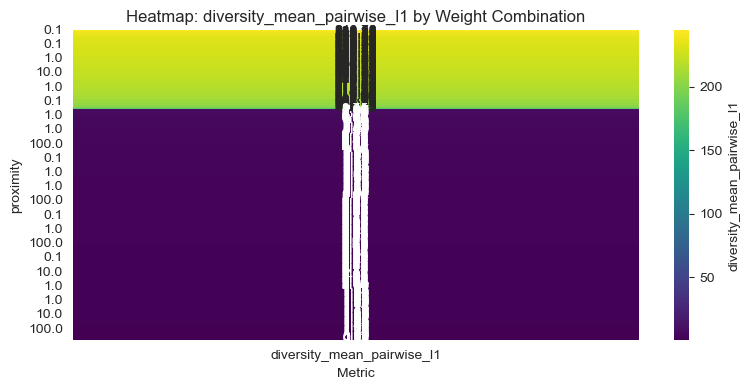

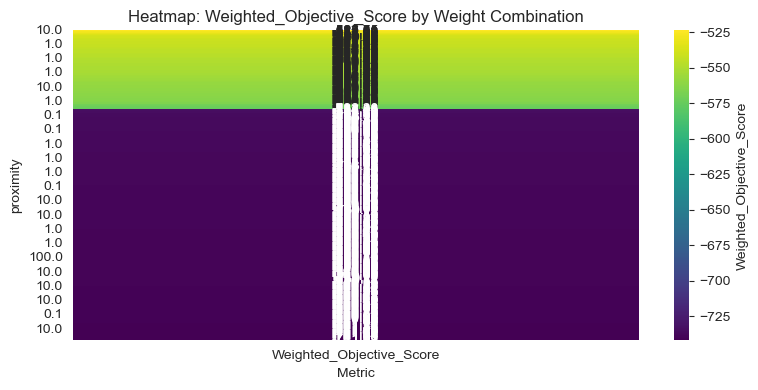

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')

# Combine the weight columns into a single string identifier
df['weight_combo'] = (
    df['proximity_weight'].astype(str)
)

# List of metrics to plot
metrics = ['proximity', 'sparsity', 'diversity_mean_pairwise_l1', 'Weighted_Objective_Score']

for metric in metrics:
    plt.figure(figsize=(8, 4))
    # Create a DataFrame suitable for heatmap (single column, so use DataFrame.pivot with index as weight_combo)
    heatmap_data = pd.DataFrame({
        'proximity_weight':df['proximity_weight'],
        metric: df[metric]
    }).set_index('proximity_weight')
    # To ensure all configs are shown, sort by score or metric if desired
    heatmap_data = heatmap_data.sort_values(by=metric, ascending=False)
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='viridis',
        fmt=".2f",
        cbar_kws={'label': metric}
    )
    plt.title(f'Heatmap: {metric} by Weight Combination')
    plt.xlabel('Metric')
    plt.ylabel('proximity')
    plt.tight_layout()
    plt.show()


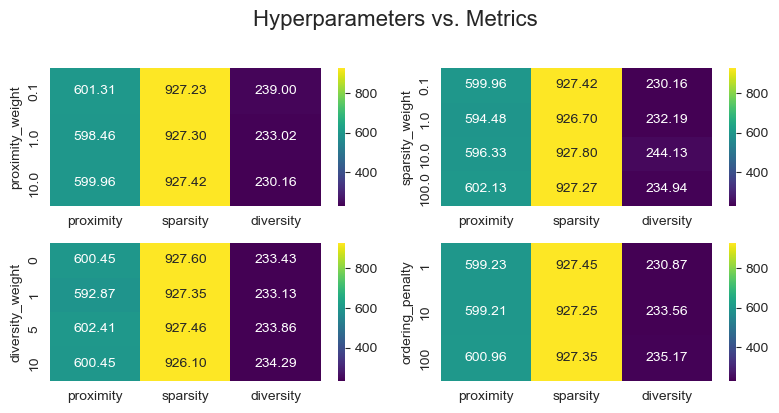

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics and hyperparameters
top_configs['diversity'] = top_configs['diversity_mean_pairwise_l1']
metrics = ['proximity', 'sparsity', 'diversity']
hyperparams = [
    'proximity_weight',
    'sparsity_weight',
    'diversity_weight',
    'ordering_penalty'
]

# Set up the subplot grid
fig, axes = plt.subplots(2,2, figsize=(2 * len(hyperparams), 4))

for idx, hp in enumerate(hyperparams):
    row = idx // 2
    col = idx % 2
    # Group by the hyperparameter and calculate mean for each metric
    heatmap_data = top_configs.groupby(hp)[metrics].mean()
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='viridis',
        fmt=".2f",
        ax=axes[row, col]
    )
    # axes[idx].set_title(hp)
    # axes[idx].set_xlabel('Metric')


plt.suptitle('Hyperparameters vs. Metrics', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming 'top_configs' is your DataFrame with the top 10 rows
# If not, use your code to generate it as shown above

# For better visualization, select relevant columns and normalize metrics
plot_df = top_configs.copy()
cols_to_normalize = ['proximity', 'sparsity', 'diversity_mean_pairwise_l1', 'score']
plot_df[cols_to_normalize] = (plot_df[cols_to_normalize] - plot_df[cols_to_normalize].min()) / (plot_df[cols_to_normalize].max() - plot_df[cols_to_normalize].min())

# Add a config ID for labeling
plot_df['config_id'] = range(1, len(plot_df)+1)

plt.figure(figsize=(12, 6))
parallel_coordinates(
    plot_df[['config_id', 'proximity', 'sparsity',
             'diversity_mean_pairwise_l1', 'score']],
    class_column='config_id',
    colormap=plt.get_cmap('tab10'),
    linewidth=2
)
plt.title('Parallel Coordinates Plot of Top 10 Configurations')
plt.xlabel('Hyperparameters and Metrics')
plt.ylabel('Normalized Value')
plt.legend(title='Config ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'top_configs' is not defined

C:\Users\Pranjal\AppData\Local\Temp\ipykernel_42992\343984688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


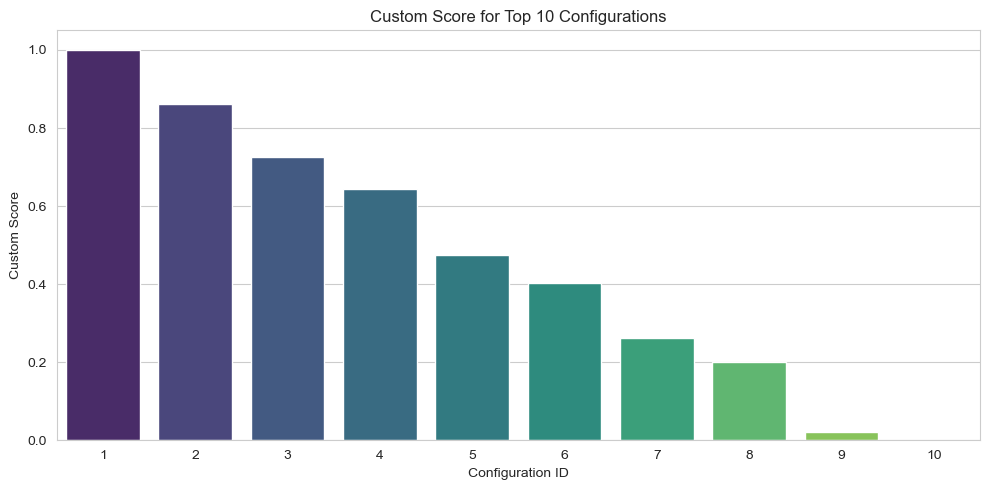

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(
    x='config_id',
    y='score',
    data=plot_df.sort_values('score', ascending=False),
    palette='viridis'
)
plt.title('Custom Score for Top 10 Configurations')
plt.xlabel('Configuration ID')
plt.ylabel('Custom Score')
plt.tight_layout()
plt.show()


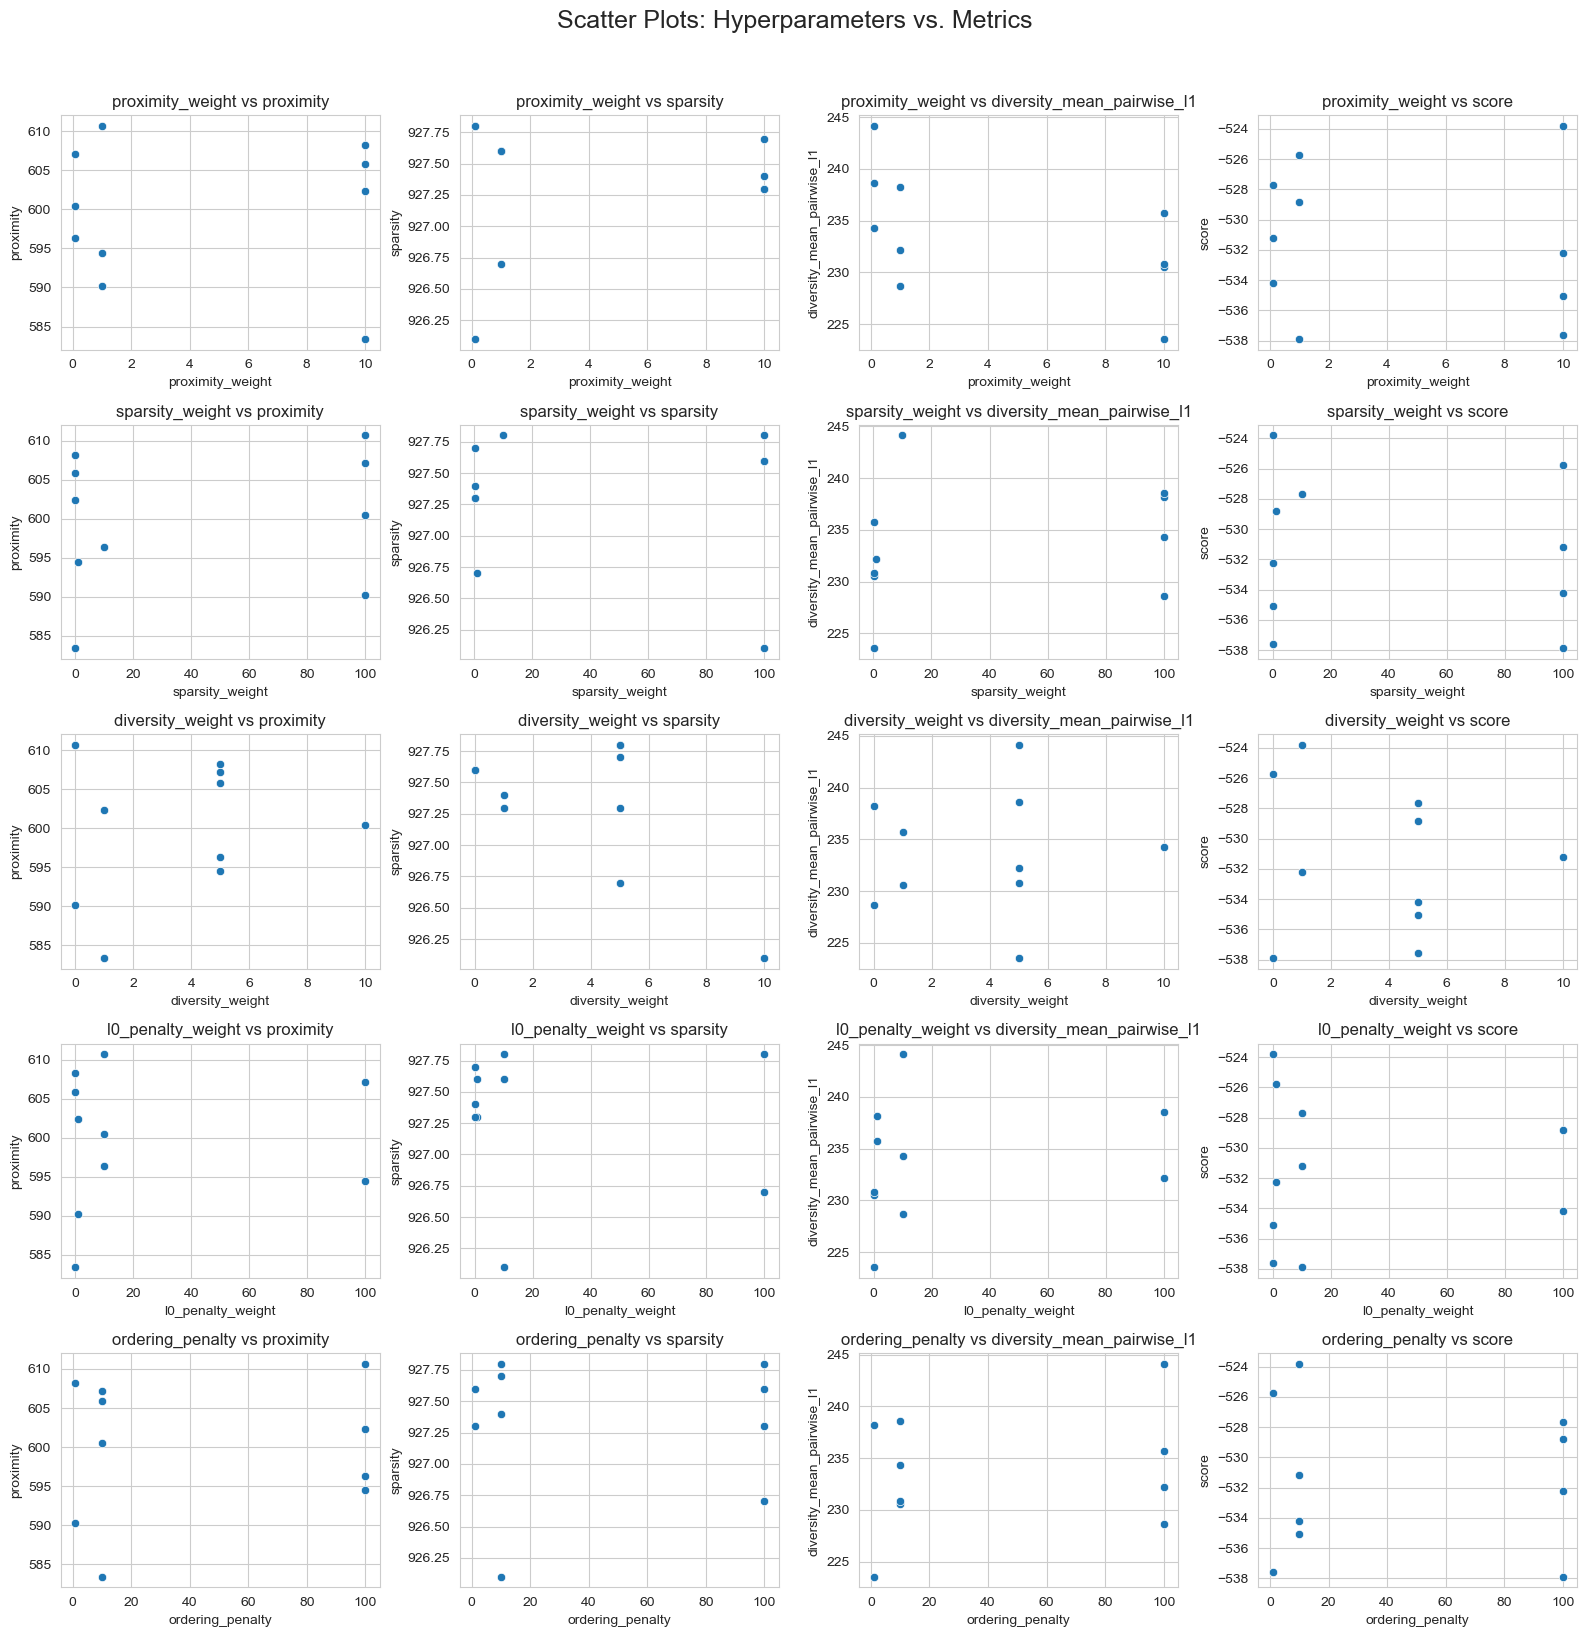

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_configs' is your DataFrame
df = top_configs.copy()

# Define hyperparameters and metrics
hyperparams = [
    'proximity_weight',
    'sparsity_weight',
    'diversity_weight',
    'l0_penalty_weight',
    'ordering_penalty'
]
metrics = [
    'proximity',
    'sparsity',
    'diversity_mean_pairwise_l1',
    'score'
]

# Set up the grid of plots
fig, axes = plt.subplots(len(hyperparams), len(metrics), figsize=(16, 16))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, hp in enumerate(hyperparams):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        sns.scatterplot(
            data=df,
            x=hp,
            y=metric,
            ax=ax
        )
        ax.set_title(f'{hp} vs {metric}')
        ax.set_xlabel(hp)
        ax.set_ylabel(metric)

plt.suptitle('Scatter Plots: Hyperparameters vs. Metrics', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [18]:
summary = df.groupby(['proximity_weight', 'sparsity_weight', 'diversity_weight']).agg({
    'proximity': 'mean',
    'sparsity': 'mean',
    'diversity_mean_pairwise_l1': 'mean'
}).reset_index()

print(summary.sort_values(by='proximity'))  # or sort by any metric


   proximity_weight  sparsity_weight  diversity_weight   proximity  sparsity  \
5              10.0              0.1                 1  592.873746    927.35   
3               1.0              1.0                 5  594.476690    926.70   
0               0.1             10.0                 5  596.329364    927.80   
4               1.0            100.0                 0  600.449796    927.60   
2               0.1            100.0                10  600.453727    926.10   
6              10.0              0.1                 5  607.047639    927.50   
1               0.1            100.0                 5  607.149423    927.80   

   diversity_mean_pairwise_l1  
5                  233.130489  
3                  232.194415  
0                  244.126024  
4                  233.427624  
2                  234.293017  
6                  227.181812  
1                  238.593541  


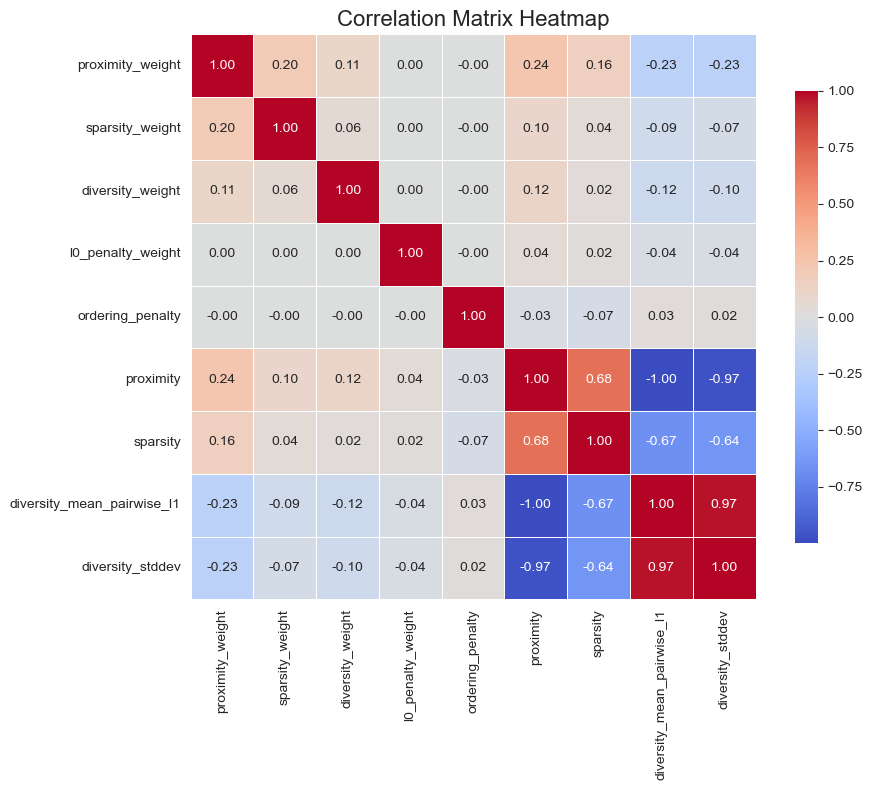

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("cf_experiment_log_1.csv")  # Change path if needed

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix,
            annot=True,         # show correlation coefficients
            fmt=".2f",          # format to 2 decimal places
            cmap="coolwarm",    # diverging color palette
            square=True,        # keep cells square
            linewidths=0.5,     # lines between cells
            cbar_kws={"shrink": 0.8})  # shrink color bar

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


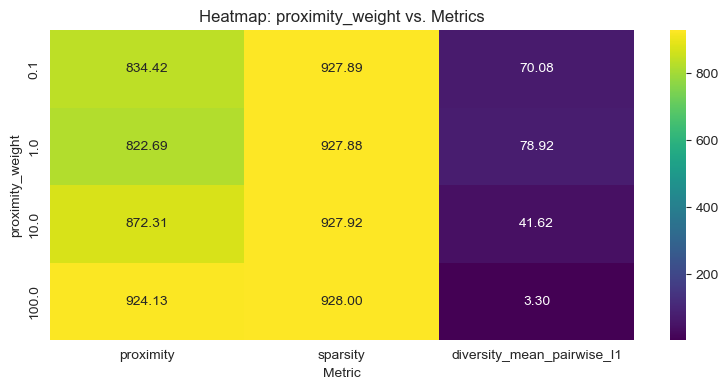

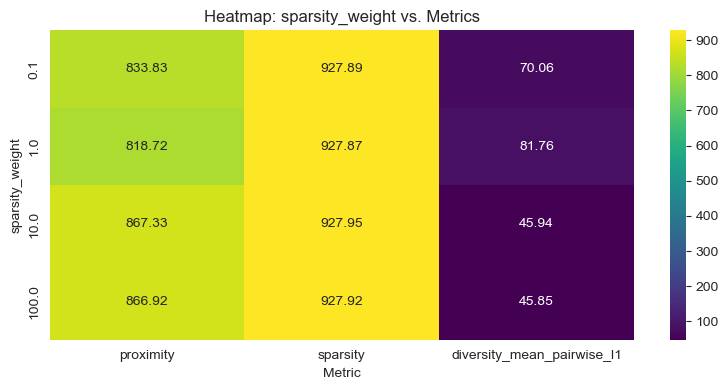

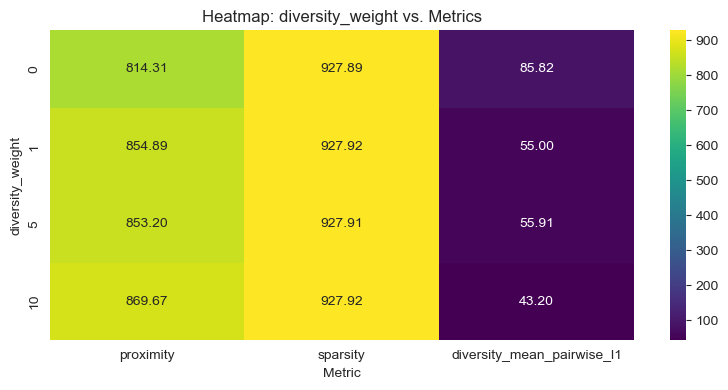

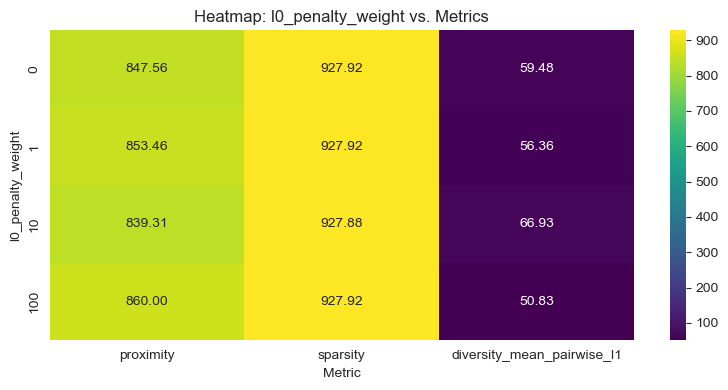

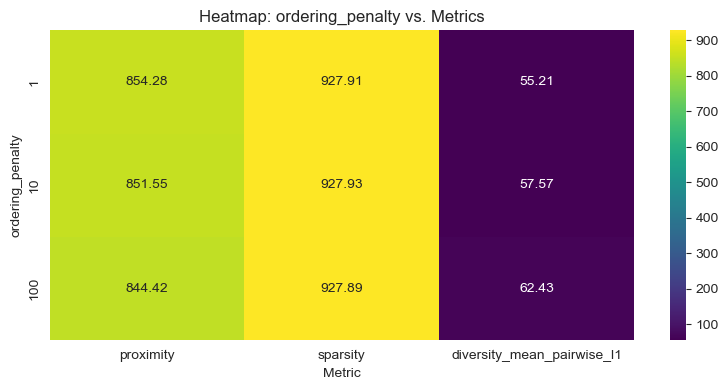

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame with all results
metrics = ['proximity', 'sparsity', 'diversity_mean_pairwise_l1', ]
hyperparams = [
    'proximity_weight',
    'sparsity_weight',
    'diversity_weight',
    'l0_penalty_weight',
    'ordering_penalty'
]

for hp in hyperparams:
    # Group by the hyperparameter and compute the mean for each metric
    heatmap_data = df.groupby(hp)[metrics].mean()
    plt.figure(figsize=(8, 4))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap='viridis',
        fmt=".2f"
    )
    plt.title(f'Heatmap: {hp} vs. Metrics')
    plt.xlabel('Metric')
    plt.ylabel(hp)
    plt.tight_layout()
    plt.show()


In [24]:
df

,proximity_weight,sparsity_weight,diversity_weight,l0_penalty_weight,ordering_penalty,proximity,sparsity,diversity_mean_pairwise_l1,diversity_stddev
0,0.1,0.1,0,0,1,924.684705,928.0,1.661084,1.103898
1,0.1,0.1,0,0,10,922.448581,928.0,2.267913,1.100488
2,0.1,0.1,0,0,100,621.303567,927.8,228.330084,37.371941
3,0.1,0.1,0,1,1,622.173802,927.7,229.842539,38.124299
4,0.1,0.1,0,1,10,921.292814,928.0,2.527255,1.584001
...,...,...,...,...,...,...,...,...,...
583,100.0,100.0,10,10,10,926.766435,928.0,1.358103,0.605082
584,100.0,100.0,10,10,100,925.345685,928.0,2.252559,1.190383
585,100.0,100.0,10,100,1,919.265390,928.0,8.003629,1.737592
586,100.0,100.0,10,100,10,925.810959,928.0,2.895811,1.078976
